# Pre Processamento

In [1]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from spacy.lang.pt.stop_words import STOP_WORDS
import numpy as np
import spacy
import pickle
import re

stop_words = STOP_WORDS
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_excel(r"D:\Users\User\Desktop\PC\Faculdade\TCC\TwitterCrawlerOficial\BasesFinais\Final30.xlsx")
df.head()

,Usuario,Bot,N_Seguidores,N_Seguidos,N_Tweets,Fechado,tweet_1,tweet_2,tweet_3,tweet_4,tweet_5,tweet_6,tweet_7,tweet_8,tweet_9,tweet_10,tweet_11,tweet_12,tweet_13,tweet_14,tweet_15,tweet_16,tweet_17,tweet_18,tweet_19,tweet_20,tweet_21,tweet_22,tweet_23,tweet_24,tweet_25,tweet_26,tweet_27,tweet_28,tweet_29,tweet_30,tweet_31,tweet_32,tweet_33,tweet_34,tweet_35,tweet_36,tweet_37,tweet_38,tweet_39,tweet_40,tweet_41,tweet_42,tweet_43,tweet_44,...,tweet_170,tweet_171,tweet_172,tweet_173,tweet_174,tweet_175,tweet_176,tweet_177,tweet_178,tweet_179,tweet_180,tweet_181,tweet_182,tweet_183,tweet_184,tweet_185,tweet_186,tweet_187,tweet_188,tweet_189,tweet_190,tweet_191,tweet_192,tweet_193,tweet_194,tweet_195,tweet_196,tweet_197,tweet_198,tweet_199,tweet_200,troca_sent,sent_neg,sent_pos,sent_neu,total_vb,total_adj,total_adv,total_pron,total_hashtag,Ano_Criacao,Tem_Background_Img,total_emoji,total_tokens,media_vb,media_adj,media_adv,media_pron,media_hashtag,media_emoji
0,tecactba,1,1160,1457,44037,0,@FERNAND70824306 É. Estão muito quietos....,@Ehcnalpsolrac @MariaAn50970229 @JorgeAfonso19...,@AntonioUlisses8 Verdade. A realidade dói e mu...,@FlavioPradela @MariaAn50970229 Idem,@tabataamaralsp Estamos cansados de protocolos...,@GloboNews 😔,@Raife_Arante @AmareloJoao @SF_Moro @ZSzczypio...,@MoniqueCheker Agradeçam ao bolsolixo mais ess...,"@MaRIANNAACS @assi_spm Nojo,nojo. Esse país vi...",@MaRIANNAACS @assi_spm 👏👏👏👏👍👍,@reflexoes199 Estamos juntos. https://t.co/iAL...,https://t.co/OvqbhuIef0,@FelipeL42349816 E pensar que a lava jato tava...,@dheferreira4 @Raife_Arante 👍👍🥰,@neuzaortiz @SF_Moro @uniaobrasil44 👍👍Alô @uni...,@joaoslz @joao_milanineto @SF_Moro Na trinchei...,@AurelioScoth @tatianavvs @marinahelenabr http...,@ariqueti @SF_Moro 👏👏👏👍👍👍 Muda Brasil !!!,@Zobaran_Rs_Br @SF_Moro 👏👏👏,@isacmariano @SF_Moro Que país é esse??? https...,@PlenaDeusa @SF_Moro @uniaobrasil44 @Bivar1717...,@Contraponto15 @o_antagonista É.,@PaludoBeatriz @o_antagonista Até quando vamos...,@FidalgoFern @o_antagonista Socorro ! Esse paí...,@eduardohardysp @o_antagonista Até quando ? 😔,#VoltaLavaJato https://t.co/d0csp4y7t9,Vem Moro e #VoltaLavaJato Socorro!,@o_antagonista Graças ao miiiito.!! Bibibibi 🏍...,@LaelsonNSilva @o_antagonista Vi e curti https...,@SF_Moro Moro vc tem nervos de Aço.! Socorro! ...,@ricardo00736795 Vá trabalhar Bolsonaro !! Par...,Vi e curti. Lá vai a economia pro espaço.🤦 htt...,@SF_Moro Quem pode com essa corte política???,@panga2021 @Edevaldo_1 SQN.🤦,@alvarodias_ Se não fosse o boicote do Podemos...,@edumilsonpapo10 Perderam a credibilidade quan...,@edumilsonpapo10 Concordo.,@BiasinFlavio E a economia vai pro espaço 🤦,@panga2021 São iguais.🤮,@edumilsonpapo10 🔥,@ailtonvieira16 @e6b2a5f8fc2b43b @SF_Moro Simmmmm,@luamarinhos @e6b2a5f8fc2b43b Parabéns. Consci...,@PHMalafaia Trocar a terceira via por Lula???🤦...,@VEJA 🤮🤮🤮,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,12,3,185,123,39,23,32,11,2021,1,77,1014,0.121302,0.038462,0.022682,0.031558,0.010848,0.075937
1,AdriannoMorales,1,271,551,15836,0,@MarietaSevero_ É fora vocês!! https://t.co/gm...,@CruzDefesa @BlogdoNoblat Faz uma enquete kkkk...,@joicehasselmann https://t.co/q249eKhgUH,@joicehasselmann https://t.co/acEH6zeK9D,@BlogdoNoblat Foram perfeitos! De tantos crimi...,@MarceloLins68 Kkkkkkkkkkkk https://t.co/4wRwN...,@MarceloLins68 https://t.co/pirBmfr5xj,@MarceloLins68 https://t.co/BUDwx3LZOz,"@MarceloLins68 Ah que pena, faltou colocar fom...",@BlogdoNoblat https://t.co/cSUmTfKzd5,@BlogdoNoblat https://t.co/DRNu7ir1aZ,@BlogdoNoblat https://t.co/1rr6XpQUtf,"@tabataamaralsp Kkkkkkkk democracia, democraci...",@monicabergamo Kkkkkkkkkkkkk https://t.co/S65C...,@folha https://t.co/9xOEEss6gl,@folha https://t.co/OvpvMNstdF,@monicabergamo Posta ai as pesquisas para o Se...,@GloboNews O jurista “ESQUERDISTA” que chamamo...,@Renato46900528 😂😂😂😂😂😂😂 otarios https://t.co/L...,@DouglasGarcia É isso ai Douglas,@SigaGazetaB

In [3]:
df['Bot'].value_counts()

0    5533
1    2301
Name: Bot, dtype: int64

In [4]:
%%time

# Essa celula tem a função de juntar os tokens de todos os tweets em uma unica lista

pln = spacy.load('pt_core_news_lg')

df['tweet_concat'] = None

for i in range(0, df.shape[0]):
    tweets_concat = []
    flat_list = []
    for j in range(1, 201):
        name_col = f"tweet_{j}"
        try:
            #doc = pln(df.loc[i, name_col])
            tweets_concat.append([token.lemma_ for token in pln(df.loc[i, name_col])])
        except:
            tweets_concat.append("")
    flat_list = [str(item) for sublist in tweets_concat for item in sublist]
            
    l = " ".join(flat_list)
    df.loc[i, 'tweet_concat'] = l


Wall time: 1h 42min 42s


In [5]:
df.dropna(subset = ['tweet_concat'], inplace = True)
df_text = df[['tweet_concat', 'Bot']]

In [6]:
df_text.shape

(7834, 2)

In [7]:
df.shape

(7834, 226)

In [8]:
df_text.head()

,tweet_concat,Bot
0,@FERNAND70824306 É. Estão muito quieto .... @E...,1
1,@MarietaSevero _ É ser você ! ! https://t.co/g...,1
2,@MarcioRomanha @ValdiviaLiette @borgescm @Cost...,1
3,Camarote só o rato https://t.co/6bbTq3KceV Bol...,1
4,@caitomainier 12 % tá nado mal ... Agora ser C...,1


In [32]:
def clean_text(data):
    for i in range(data.shape[0]):
        try:
            data[i] = data[i].lower()
            data[i] = data[i].rstrip()
        except:
            continue
    return data

filtro = ['+','!','"','#','$','%','&','(',')','*',',','-','.','/',':',';','<',
          '=','>','?','@','[',']','^','_','`','{','|','}','🇷','🇧','”','“','0','1',
          '2','3','4','5','6','7','8','9','°','+','!','"','#','$','%','&','(',')','*',',','-','.','/',':',';',
          '<', ' ', 'vc','the','=','>','?','@','[',']','^','_','`','{','|','}','🇷','🇧','”','“','0','1', '..', '.',
          '2','3','4','5','6','7','8','9','°', '[]', '...', '', '…', 'pra', 'tá', '¡', 'q', 
          'bolsonaropresidente', 'lulapresidente', 'bolsoladrao', 'luladrao', 'Lula', 'Bolsonaro',
          'lula', 'bolsonaro', 'umar', '@jairbolsonaro', '@lulaoficial']

def remove_sw(text):
    try:
        text = [word.lower() for word in text.split() if word.lower() not in stop_words and word.lower() not in filtro]
        return " ".join(text)
    except:
        return text

In [33]:
with open(r'D:\Users\User\Desktop\PC\Faculdade\TCC\TwitterCrawlerOficial\BasesFinais\Emoji_Dict.p', 'rb') as fp: #abre um dic de emoji
    Emoji_Dict = pickle.load(fp)
Emoji_Dict = {v: k for k, v in Emoji_Dict.items()}
Emoji_Dict['🤮'] = ':face_vomiting:'
Emoji_Dict['🤭'] = ':face_with_hand_over_mouth:'
Emoji_Dict['🥱'] = ':yawning_face:'
Emoji_Dict['🤩'] = ':grinning_face_with_star_eyes:'
Emoji_Dict['🤪'] = ':zany_face:'
Emoji_Dict['0️⃣'] = ':keycap_digit_zero:'
Emoji_Dict['1️⃣'] = ':keycap_digit_one:'
Emoji_Dict['2️⃣'] = ':keycap_digit_two:'
Emoji_Dict['3️⃣'] = ':keycap_digit_tree:'
Emoji_Dict['4️⃣'] = ':keycap_digit_tree:'
Emoji_Dict['5️⃣'] = ':keycap_digit_five:'
Emoji_Dict['6️⃣'] = ':keycap_digit_six:'
Emoji_Dict['7️⃣'] = ':keycap_digit_six:'
Emoji_Dict['9️⃣'] = ':keycap_digit_nine:'
Emoji_Dict['🥳'] = ':party_face:'
Emoji_Dict['🥰'] = ':smiling_face_with_hearts:'
Emoji_Dict['🦜'] = ':parrot:'
Emoji_Dict['🤫'] = ':face_with_finger_covering_closed_lips:'
Emoji_Dict['🤨'] = ':face_with_raised_eyebrow:'
Emoji_Dict['🤯'] = ':shocked_face_with_exploding_head:'
Emoji_Dict['🪂'] = ':parachute:'
Emoji_Dict['🧟'] = ':zombie:'
Emoji_Dict['🥶'] = ':freezing_face:'
Emoji_Dict['🥴'] = ':face_with_uneven_eyes_and_wavy_mouth:'
Emoji_Dict['☛'] = ':black_right_pointing_index:'
Emoji_Dict['🤬'] = ':serious_face_with_symbols_covering_mouth:'
Emoji_Dict['🥵'] = ':overheated_face:'
Emoji_Dict['🧐'] = ':face_with_monocle:'
Emoji_Dict['🦠'] = ':microbe:'
Emoji_Dict['🥺'] = ':face_with_pleading_eyes:'
Emoji_Dict['🤏'] = ':pinching_hand:'
Emoji_Dict['🦞'] = ':lobster:'
Emoji_Dict['🧜'] = ':merperson:'
Emoji_Dict['🟩'] = ':large_green_square:'
Emoji_Dict['🟨'] = ':large_yellow_square:'
Emoji_Dict['🟥'] = ':large_red_square:'
Emoji_Dict['🟦'] = ':large_blue_square:'
Emoji_Dict['★'] = ':black_star:'
Emoji_Dict['🩹'] = ':adhesive_bandage:'
Emoji_Dict['🤍'] = ':white_heart:'
Emoji_Dict['🤎'] = ':brow_heart:'
Emoji_Dict['🦸'] = ':superhero:'
Emoji_Dict['🟠'] = ':large_orange_circle:'
Emoji_Dict['🟡'] = ':large_yellow_circle:'
Emoji_Dict['🟢'] = ':large_green_circle:'
Emoji_Dict['🟣'] = ':large_blue_circle:'
Emoji_Dict['🧑'] = ':person:'
Emoji_Dict['🧎'] = ':person_kneeling:'
Emoji_Dict['🪓'] = ':axe:'

def convert_emojis_to_word(text):
    try:
        for emot in Emoji_Dict:
            text = re.sub(r'('+emot+')', "_".join(Emoji_Dict[emot].replace(",","").replace(":","").split()), text)
    except:
        return text
    
    return text

In [34]:
aux = df_text['tweet_concat'].copy()
names = pd.Series(aux)
names = clean_text(names)
names = names.map(lambda x:remove_sw(x))
names = names.map(lambda x: convert_emojis_to_word(x))
names

0       @fernand70824306 é. .... @ehcnalpsolrac @maria...
1       @marietasevero https://t.co/gmfulbsqwf @cruzde...
2       @marcioromanha @valdivialiette @borgescm @cost...
3       camarote rato https://t.co/6bbtq3kcev cagar sa...
4       @caitomainier 12 nado ciro gomes keycap_digit_...
                              ...                        
7829    hey wanna buy this get from here fast_down_but...
7830    symbolica dark ride efteling amusement park – ...
7831    heavy_dollar_sign heavy_dollar_sign money_bag ...
7832    @gabrielvsobrei1 @sf_moro acre merecer espnfcb...
7833    ‘ favela vencer ’ favelados leiam @fabi2moraes...
Name: tweet_concat, Length: 7834, dtype: object

In [35]:
from collections import Counter
import pickle
import re

pln = spacy.load('pt_core_news_lg')

In [36]:
df_text_aux = pd.DataFrame({'tweet_concat': names,
                            'Bot': df_text['Bot']})

In [37]:
df_text_aux.shape

(7834, 2)

In [ ]:
#df_text_aux.to_excel(r"D:\Users\User\Desktop\PC\Faculdade\TCC\TwitterCrawlerOficial\BasesFinais\Concatenados.xlsx", index = False)

Criando base para rodar o modelo:

In [38]:
max_nb_words = 800000
max_sequence_length = 3000

tokenizer = Tokenizer(num_words = max_nb_words, 
                      filters='+!"#$%&()*,-./:;<=>?@[\]^_`{|}🇷🇧”“0123456789°', 
                      lower = True)
tokenizer.fit_on_texts(df_text_aux['tweet_concat'])
word_index = tokenizer.word_index

# concatenar os 200 tweets, depois separar em tokens
aux_text = tokenizer.texts_to_sequences(df_text_aux['tweet_concat'])
aux_text = pad_sequences(aux_text, maxlen = max_sequence_length, truncating = 'post')
print(aux_text.shape)

(7834, 3000)


In [39]:
len(word_index)

752605

In [40]:
aux = pd.DataFrame(aux_text)
aux_2 = df[['N_Seguidores', 'N_Seguidos', 'N_Tweets', 'sent_neg', 'sent_pos', 'sent_neu', 'troca_sent', 'media_vb', 
            'media_adj', 'media_adv', 'media_pron', 'media_hashtag', 'Ano_Criacao', 'Tem_Background_Img', 'Bot']]
df_modelo = pd.concat([aux, aux_2], axis=1)
df_modelo.to_excel(r"D:\Users\User\Desktop\PC\Faculdade\TCC\TwitterCrawlerOficial\BasesFinais\baseModelo.xlsx", index = False)

In [41]:
df_modelo.shape

(7834, 3015)

# Análises com relação a sintaxe dos tweets, sentimento e métricas da plataforma

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel(r"D:\Users\User\Desktop\PC\Faculdade\TCC\TwitterCrawlerOficial\BasesFinais\Final30.xlsx")

In [4]:
df['Bot'] = np.where(df['Bot'] == 1, "Bot", "Não Bot")
df

,Usuario,Bot,N_Seguidores,N_Seguidos,N_Tweets,Fechado,tweet_1,tweet_2,tweet_3,tweet_4,tweet_5,tweet_6,tweet_7,tweet_8,tweet_9,tweet_10,tweet_11,tweet_12,tweet_13,tweet_14,tweet_15,tweet_16,tweet_17,tweet_18,tweet_19,tweet_20,tweet_21,tweet_22,tweet_23,tweet_24,tweet_25,tweet_26,tweet_27,tweet_28,tweet_29,tweet_30,tweet_31,tweet_32,tweet_33,tweet_34,tweet_35,tweet_36,tweet_37,tweet_38,tweet_39,tweet_40,tweet_41,tweet_42,tweet_43,tweet_44,...,tweet_170,tweet_171,tweet_172,tweet_173,tweet_174,tweet_175,tweet_176,tweet_177,tweet_178,tweet_179,tweet_180,tweet_181,tweet_182,tweet_183,tweet_184,tweet_185,tweet_186,tweet_187,tweet_188,tweet_189,tweet_190,tweet_191,tweet_192,tweet_193,tweet_194,tweet_195,tweet_196,tweet_197,tweet_198,tweet_199,tweet_200,troca_sent,sent_neg,sent_pos,sent_neu,total_vb,total_adj,total_adv,total_pron,total_hashtag,Ano_Criacao,Tem_Background_Img,total_emoji,total_tokens,media_vb,media_adj,media_adv,media_pron,media_hashtag,media_emoji
0,tecactba,Bot,1160,1457,44037,0,@FERNAND70824306 É. Estão muito quietos....,@Ehcnalpsolrac @MariaAn50970229 @JorgeAfonso19...,@AntonioUlisses8 Verdade. A realidade dói e mu...,@FlavioPradela @MariaAn50970229 Idem,@tabataamaralsp Estamos cansados de protocolos...,@GloboNews 😔,@Raife_Arante @AmareloJoao @SF_Moro @ZSzczypio...,@MoniqueCheker Agradeçam ao bolsolixo mais ess...,"@MaRIANNAACS @assi_spm Nojo,nojo. Esse país vi...",@MaRIANNAACS @assi_spm 👏👏👏👏👍👍,@reflexoes199 Estamos juntos. https://t.co/iAL...,https://t.co/OvqbhuIef0,@FelipeL42349816 E pensar que a lava jato tava...,@dheferreira4 @Raife_Arante 👍👍🥰,@neuzaortiz @SF_Moro @uniaobrasil44 👍👍Alô @uni...,@joaoslz @joao_milanineto @SF_Moro Na trinchei...,@AurelioScoth @tatianavvs @marinahelenabr http...,@ariqueti @SF_Moro 👏👏👏👍👍👍 Muda Brasil !!!,@Zobaran_Rs_Br @SF_Moro 👏👏👏,@isacmariano @SF_Moro Que país é esse??? https...,@PlenaDeusa @SF_Moro @uniaobrasil44 @Bivar1717...,@Contraponto15 @o_antagonista É.,@PaludoBeatriz @o_antagonista Até quando vamos...,@FidalgoFern @o_antagonista Socorro ! Esse paí...,@eduardohardysp @o_antagonista Até quando ? 😔,#VoltaLavaJato https://t.co/d0csp4y7t9,Vem Moro e #VoltaLavaJato Socorro!,@o_antagonista Graças ao miiiito.!! Bibibibi 🏍...,@LaelsonNSilva @o_antagonista Vi e curti https...,@SF_Moro Moro vc tem nervos de Aço.! Socorro! ...,@ricardo00736795 Vá trabalhar Bolsonaro !! Par...,Vi e curti. Lá vai a economia pro espaço.🤦 htt...,@SF_Moro Quem pode com essa corte política???,@panga2021 @Edevaldo_1 SQN.🤦,@alvarodias_ Se não fosse o boicote do Podemos...,@edumilsonpapo10 Perderam a credibilidade quan...,@edumilsonpapo10 Concordo.,@BiasinFlavio E a economia vai pro espaço 🤦,@panga2021 São iguais.🤮,@edumilsonpapo10 🔥,@ailtonvieira16 @e6b2a5f8fc2b43b @SF_Moro Simmmmm,@luamarinhos @e6b2a5f8fc2b43b Parabéns. Consci...,@PHMalafaia Trocar a terceira via por Lula???🤦...,@VEJA 🤮🤮🤮,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,12,3,185,123,39,23,32,11,2021,1,77,1014,0.121302,0.038462,0.022682,0.031558,0.010848,0.075937
1,AdriannoMorales,Bot,271,551,15836,0,@MarietaSevero_ É fora vocês!! https://t.co/gm...,@CruzDefesa @BlogdoNoblat Faz uma enquete kkkk...,@joicehasselmann https://t.co/q249eKhgUH,@joicehasselmann https://t.co/acEH6zeK9D,@BlogdoNoblat Foram perfeitos! De tantos crimi...,@MarceloLins68 Kkkkkkkkkkkk https://t.co/4wRwN...,@MarceloLins68 https://t.co/pirBmfr5xj,@MarceloLins68 https://t.co/BUDwx3LZOz,"@MarceloLins68 Ah que pena, faltou colocar fom...",@BlogdoNoblat https://t.co/cSUmTfKzd5,@BlogdoNoblat https://t.co/DRNu7ir1aZ,@BlogdoNoblat https://t.co/1rr6XpQUtf,"@tabataamaralsp Kkkkkkkk democracia, democraci...",@monicabergamo Kkkkkkkkkkkkk https://t.co/S65C...,@folha https://t.co/9xOEEss6gl,@folha https://t.co/OvpvMNstdF,@monicabergamo Posta ai as pesquisas para o Se...,@GloboNews O jurista “ESQUERDISTA” que chamamo...,@Renato46900528 😂😂😂😂😂😂😂 otarios https://t.co/L...,@DouglasGarcia É isso ai Douglas,@SigaGaz

In [45]:
df_bot = df[df['Bot'] == "Bot"]
df_hum = df[df['Bot'] == "Não Bot"]

# # # Sintaxe
# # Bot
# print(f"Média {df_bot['media_vb'].describe()['mean']} \nMediana {df_bot['media_vb'].describe()['50%']}\n")
# print(f"Média {df_bot['media_adv'].describe()['mean']} \nMediana {df_bot['media_adv'].describe()['50%']}\n")
# print(f"Média {df_bot['media_adj'].describe()['mean']} \nMediana {df_bot['media_adj'].describe()['50%']}\n")
# print(f"Média {df_bot['media_pron'].describe()['mean']} \nMediana {df_bot['media_pron'].describe()['50%']}\n")
# print(f"Média {df_bot['media_hashtag'].describe()['mean']} \nMediana {df_bot['media_hashtag'].describe()['50%']}\n")
# print(f"Média {df_bot['media_emoji'].describe()['mean']} \nMediana {df_bot['media_emoji'].describe()['50%']}\n")

# # Humano
# print(f"Média {df_hum['media_vb'].describe()['mean']} \nMediana {df_hum['media_vb'].describe()['50%']}\n")
# print(f"Média {df_hum['media_adv'].describe()['mean']} \nMediana {df_hum['media_adv'].describe()['50%']}\n")
# print(f"Média {df_hum['media_adj'].describe()['mean']} \nMediana {df_hum['media_adj'].describe()['50%']}\n")
# print(f"Média {df_hum['media_pron'].describe()['mean']} \nMediana {df_hum['media_pron'].describe()['50%']}\n")
# print(f"Média {df_hum['media_hashtag'].describe()['mean']} \nMediana {df_hum['media_hashtag'].describe()['50%']}\n")
# print(f"Média {df_hum['media_emoji'].describe()['mean']} \nMediana {df_hum['media_emoji'].describe()['50%']}\n")

# # # Sentimento
# # Bot
# print(f"Média {df_bot['troca_sent'].describe()['mean']} \nMediana {df_bot['troca_sent'].describe()['50%']}\n")
# print(f"Média {df_bot['sent_neg'].describe()['mean']} \nMediana {df_bot['sent_neg'].describe()['50%']}\n")
# print(f"Média {df_bot['sent_pos'].describe()['mean']} \nMediana {df_bot['sent_pos'].describe()['50%']}\n")
# print(f"Média {df_bot['sent_neu'].describe()['mean']} \nMediana {df_bot['sent_neu'].describe()['50%']}\n")

# # Humano
# print(f"Média {df_hum['troca_sent'].describe()['mean']} \nMediana {df_hum['troca_sent'].describe()['50%']}\n")
# print(f"Média {df_hum['sent_neg'].describe()['mean']} \nMediana {df_hum['sent_neg'].describe()['50%']}\n")
# print(f"Média {df_hum['sent_pos'].describe()['mean']} \nMediana {df_hum['sent_pos'].describe()['50%']}\n")
# print(f"Média {df_hum['sent_neu'].describe()['mean']} \nMediana {df_hum['sent_neu'].describe()['50%']}\n")

# # # Metricas 
# # Bot
# print(f"Média {df_bot['N_Seguidores'].describe()['mean']} \nMediana {df_bot['N_Seguidores'].describe()['50%']}\n")
# print(f"Média {df_bot['N_Seguidos'].describe()['mean']} \nMediana {df_bot['N_Seguidos'].describe()['50%']}\n")
# print(f"Média {df_bot['N_Tweets'].describe()['mean']} \nMediana {df_bot['N_Tweets'].describe()['50%']}\n")

# # Humano
# print(f"Média {df_hum['N_Seguidores'].describe()['mean']} \nMediana {df_hum['N_Seguidores'].describe()['50%']}\n")
# print(f"Média {df_hum['N_Seguidos'].describe()['mean']} \nMediana {df_hum['N_Seguidos'].describe()['50%']}\n")
# print(f"Média {df_hum['N_Tweets'].describe()['mean']} \nMediana {df_hum['N_Tweets'].describe()['50%']}\n")

In [54]:
df.head(1)

,Usuario,Bot,N_Seguidores,N_Seguidos,N_Tweets,Fechado,tweet_1,tweet_2,tweet_3,tweet_4,tweet_5,tweet_6,tweet_7,tweet_8,tweet_9,tweet_10,tweet_11,tweet_12,tweet_13,tweet_14,tweet_15,tweet_16,tweet_17,tweet_18,tweet_19,tweet_20,tweet_21,tweet_22,tweet_23,tweet_24,tweet_25,tweet_26,tweet_27,tweet_28,tweet_29,tweet_30,tweet_31,tweet_32,tweet_33,tweet_34,tweet_35,tweet_36,tweet_37,tweet_38,tweet_39,tweet_40,tweet_41,tweet_42,tweet_43,tweet_44,...,tweet_170,tweet_171,tweet_172,tweet_173,tweet_174,tweet_175,tweet_176,tweet_177,tweet_178,tweet_179,tweet_180,tweet_181,tweet_182,tweet_183,tweet_184,tweet_185,tweet_186,tweet_187,tweet_188,tweet_189,tweet_190,tweet_191,tweet_192,tweet_193,tweet_194,tweet_195,tweet_196,tweet_197,tweet_198,tweet_199,tweet_200,troca_sent,sent_neg,sent_pos,sent_neu,total_vb,total_adj,total_adv,total_pron,total_hashtag,Ano_Criacao,Tem_Background_Img,total_emoji,total_tokens,media_vb,media_adj,media_adv,media_pron,media_hashtag,media_emoji
0,tecactba,1,1160,1457,44037,0,@FERNAND70824306 É. Estão muito quietos....,@Ehcnalpsolrac @MariaAn50970229 @JorgeAfonso19...,@AntonioUlisses8 Verdade. A realidade dói e mu...,@FlavioPradela @MariaAn50970229 Idem,@tabataamaralsp Estamos cansados de protocolos...,@GloboNews 😔,@Raife_Arante @AmareloJoao @SF_Moro @ZSzczypio...,@MoniqueCheker Agradeçam ao bolsolixo mais ess...,"@MaRIANNAACS @assi_spm Nojo,nojo. Esse país vi...",@MaRIANNAACS @assi_spm 👏👏👏👏👍👍,@reflexoes199 Estamos juntos. https://t.co/iAL...,https://t.co/OvqbhuIef0,@FelipeL42349816 E pensar que a lava jato tava...,@dheferreira4 @Raife_Arante 👍👍🥰,@neuzaortiz @SF_Moro @uniaobrasil44 👍👍Alô @uni...,@joaoslz @joao_milanineto @SF_Moro Na trinchei...,@AurelioScoth @tatianavvs @marinahelenabr http...,@ariqueti @SF_Moro 👏👏👏👍👍👍 Muda Brasil !!!,@Zobaran_Rs_Br @SF_Moro 👏👏👏,@isacmariano @SF_Moro Que país é esse??? https...,@PlenaDeusa @SF_Moro @uniaobrasil44 @Bivar1717...,@Contraponto15 @o_antagonista É.,@PaludoBeatriz @o_antagonista Até quando vamos...,@FidalgoFern @o_antagonista Socorro ! Esse paí...,@eduardohardysp @o_antagonista Até quando ? 😔,#VoltaLavaJato https://t.co/d0csp4y7t9,Vem Moro e #VoltaLavaJato Socorro!,@o_antagonista Graças ao miiiito.!! Bibibibi 🏍...,@LaelsonNSilva @o_antagonista Vi e curti https...,@SF_Moro Moro vc tem nervos de Aço.! Socorro! ...,@ricardo00736795 Vá trabalhar Bolsonaro !! Par...,Vi e curti. Lá vai a economia pro espaço.🤦 htt...,@SF_Moro Quem pode com essa corte política???,@panga2021 @Edevaldo_1 SQN.🤦,@alvarodias_ Se não fosse o boicote do Podemos...,@edumilsonpapo10 Perderam a credibilidade quan...,@edumilsonpapo10 Concordo.,@BiasinFlavio E a economia vai pro espaço 🤦,@panga2021 São iguais.🤮,@edumilsonpapo10 🔥,@ailtonvieira16 @e6b2a5f8fc2b43b @SF_Moro Simmmmm,@luamarinhos @e6b2a5f8fc2b43b Parabéns. Consci...,@PHMalafaia Trocar a terceira via por Lula???🤦...,@VEJA 🤮🤮🤮,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,12,3,185,123,39,23,32,11,2021,1,77,1014,0.121302,0.038462,0.022682,0.031558,0.010848,0.075937


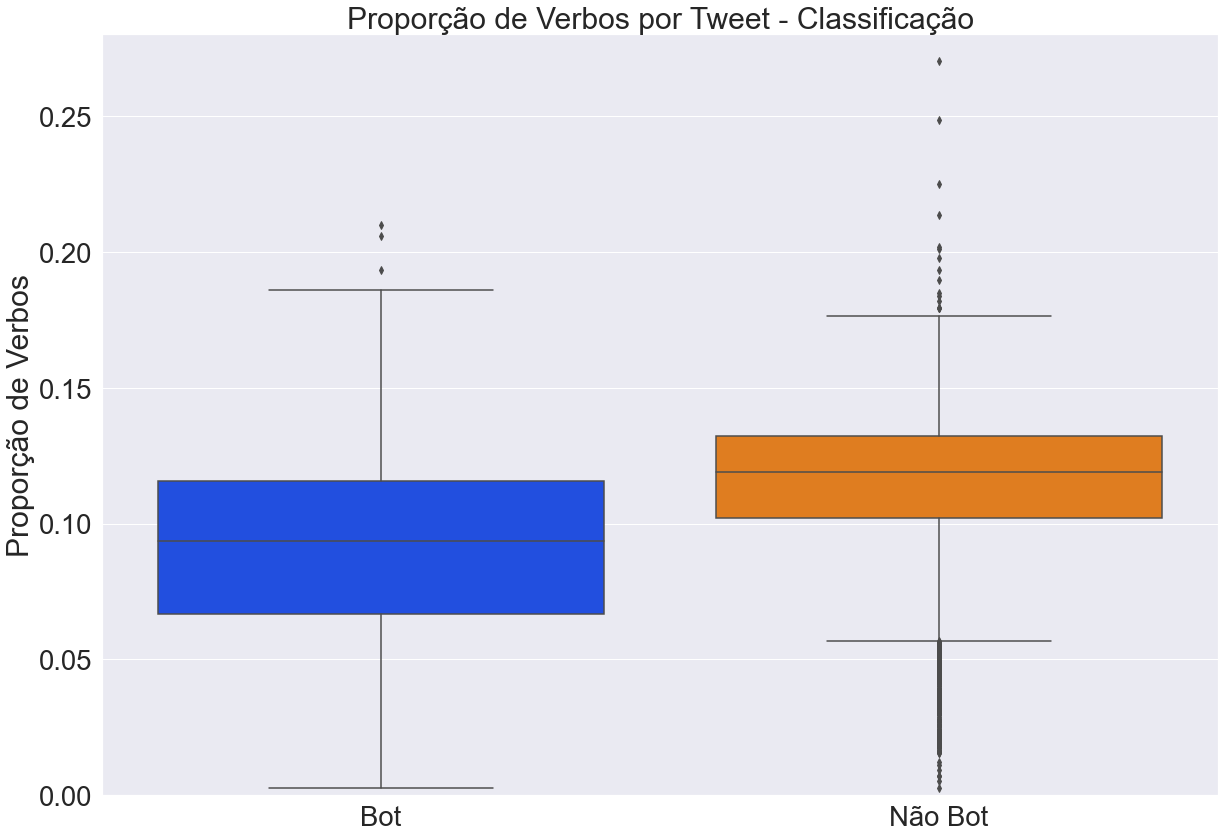

In [70]:
sns.set(font_scale=2.5)
fig = plt.figure(figsize=(20,14))
g = sns.boxplot(x = 'Bot', y = 'media_vb', data = df, hue = 'Bot', dodge=False, palette = "bright")
g.legend_.remove()
plt.title('Proporção de Verbos por Tweet - Classificação')
plt.ylim(0, 0.28)
plt.xlabel('')
plt.ylabel('Proporção de Verbos')
plt.show()

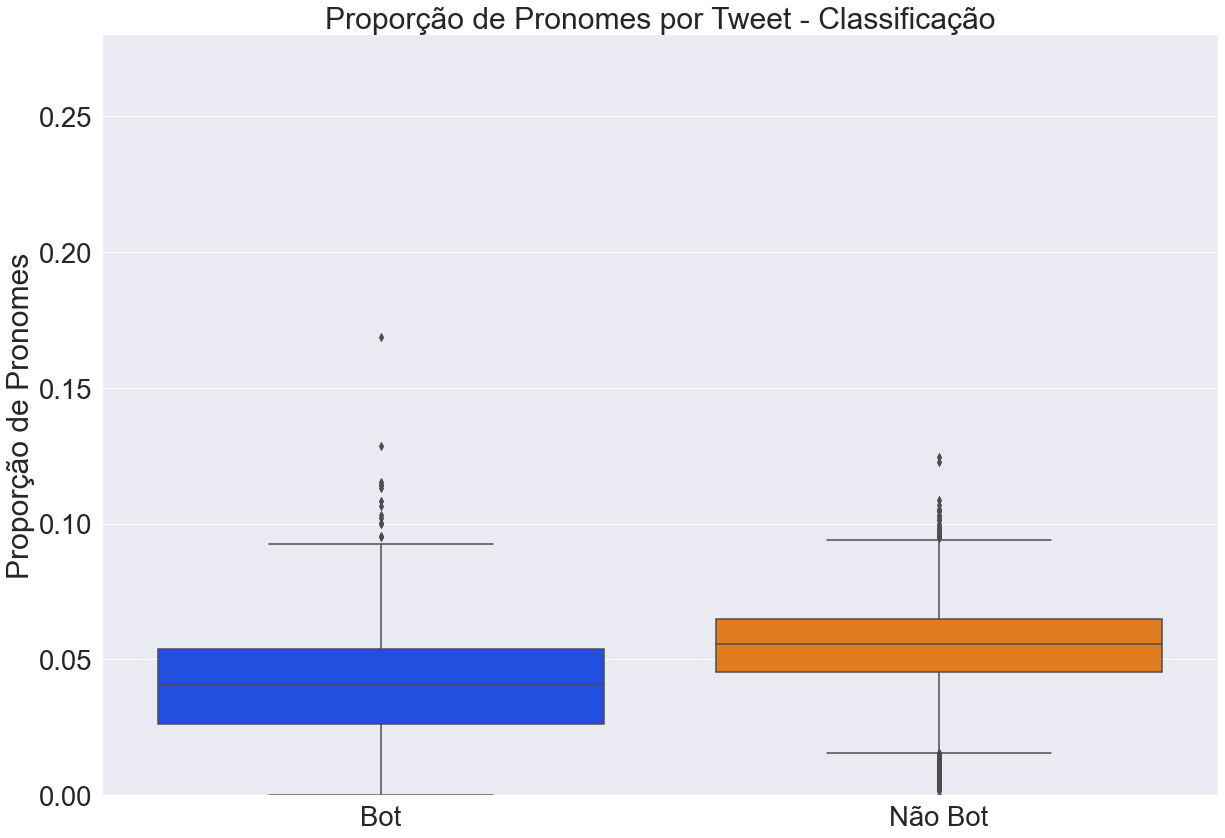

In [71]:
sns.set(font_scale=2.5)
fig = plt.figure(figsize=(20,14))
g = sns.boxplot(x = 'Bot', y = 'media_pron', data = df, hue = 'Bot', dodge=False, palette = "bright")
g.legend_.remove()
plt.title('Proporção de Pronomes por Tweet - Classificação')
plt.ylim(0, 0.28)
plt.xlabel('')
plt.ylabel('Proporção de Pronomes')
plt.show()

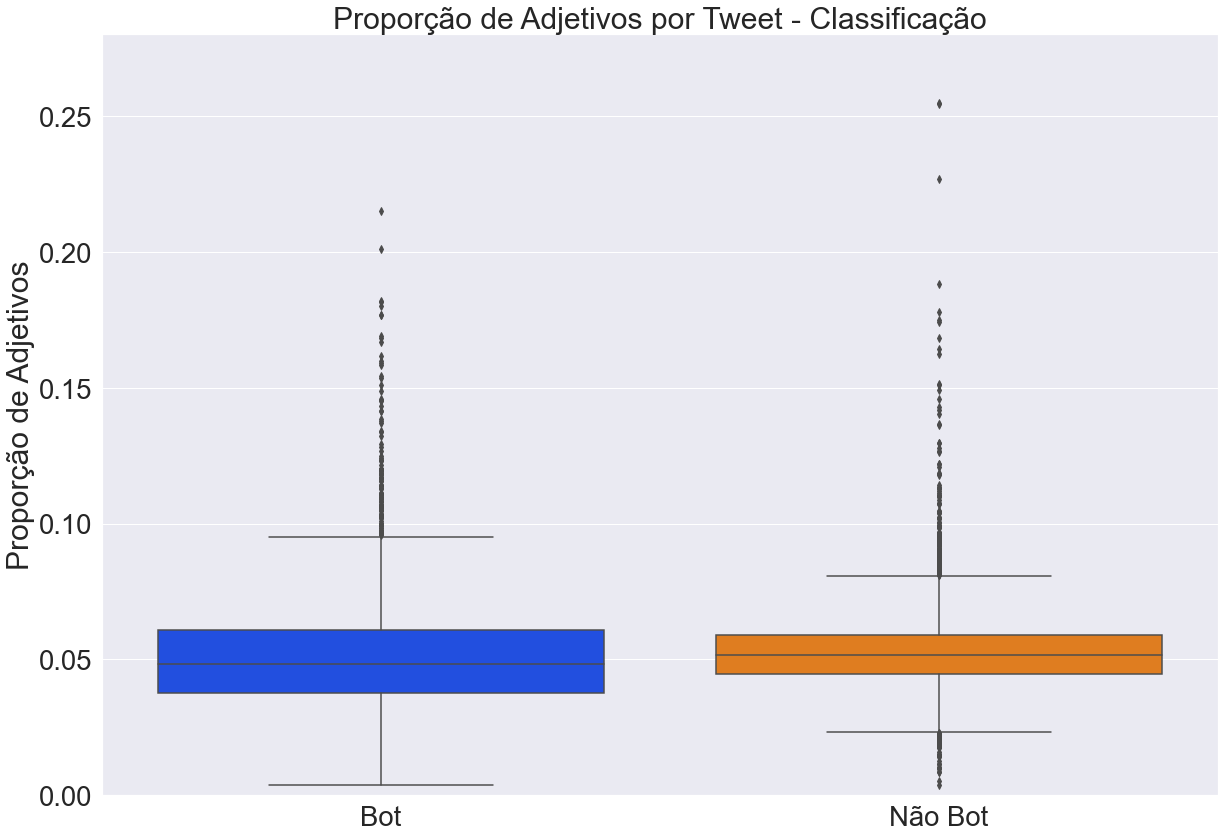

In [72]:
sns.set(font_scale=2.5)
fig = plt.figure(figsize=(20,14))
g = sns.boxplot(x = 'Bot', y = 'media_adj', data = df, hue = 'Bot', dodge=False, palette = "bright")
g.legend_.remove()
plt.title('Proporção de Adjetivos por Tweet - Classificação')
plt.ylim(0, 0.28)
plt.xlabel('')
plt.ylabel('Proporção de Adjetivos')
plt.show()

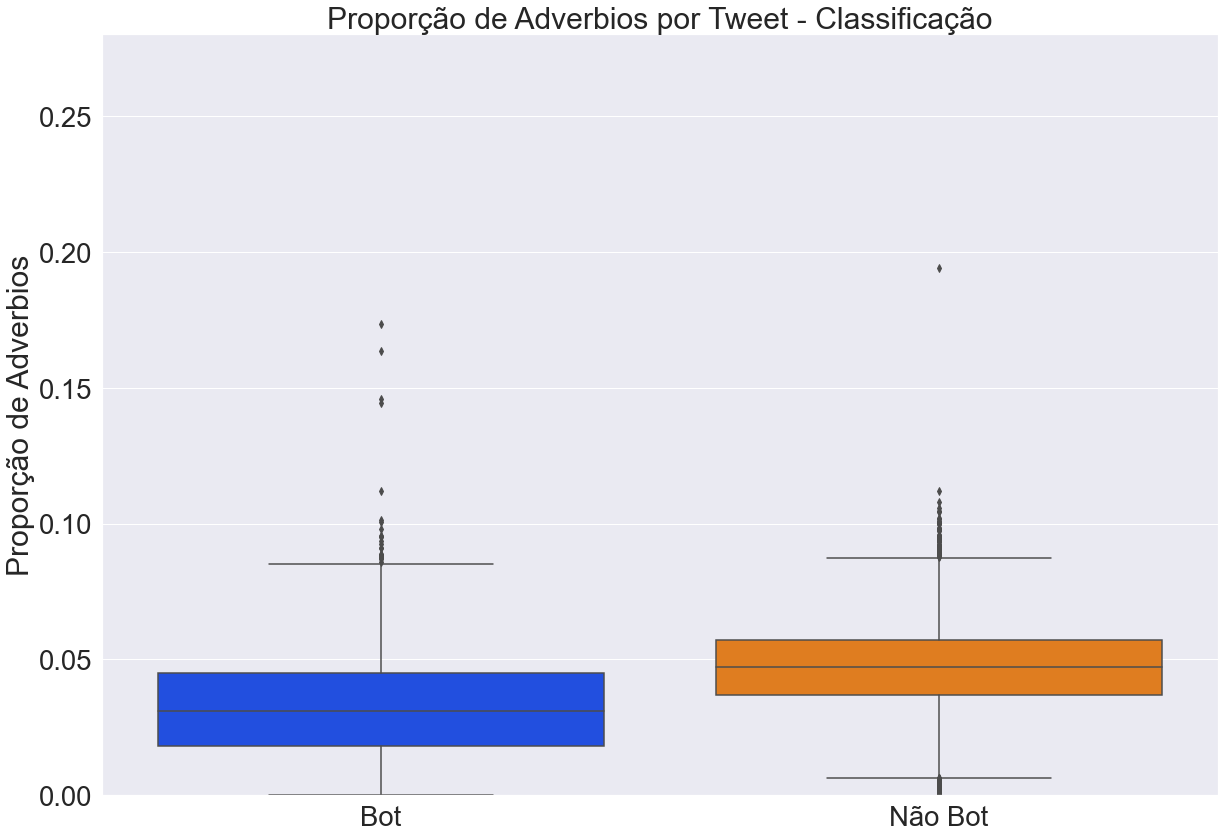

In [73]:
sns.set(font_scale=2.5)
fig = plt.figure(figsize=(20,14))
g = sns.boxplot(x = 'Bot', y = 'media_adv', data = df, hue = 'Bot', dodge=False, palette = "bright")
g.legend_.remove()
plt.title('Proporção de Adverbios por Tweet - Classificação')
plt.ylim(0, 0.28)
plt.xlabel('')
plt.ylabel('Proporção de Adverbios')
plt.show()

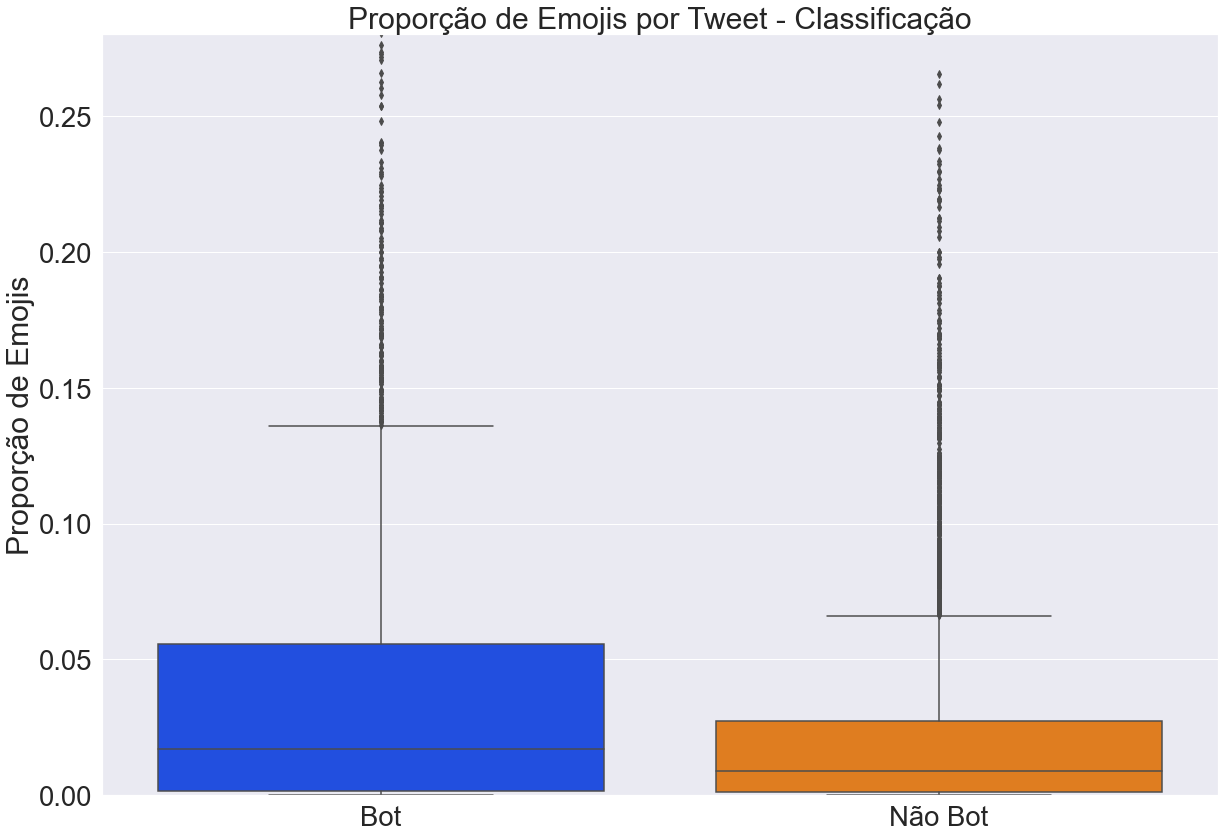

In [75]:
sns.set(font_scale=2.5)
fig = plt.figure(figsize=(20,14))
g = sns.boxplot(x = 'Bot', y = 'media_emoji', data = df, hue = 'Bot', dodge=False, palette = "bright")
g.legend_.remove()
plt.title('Proporção de Emojis por Tweet - Classificação')
plt.ylim(0, 0.28)
plt.xlabel('')
plt.ylabel('Proporção de Emojis')
plt.show()

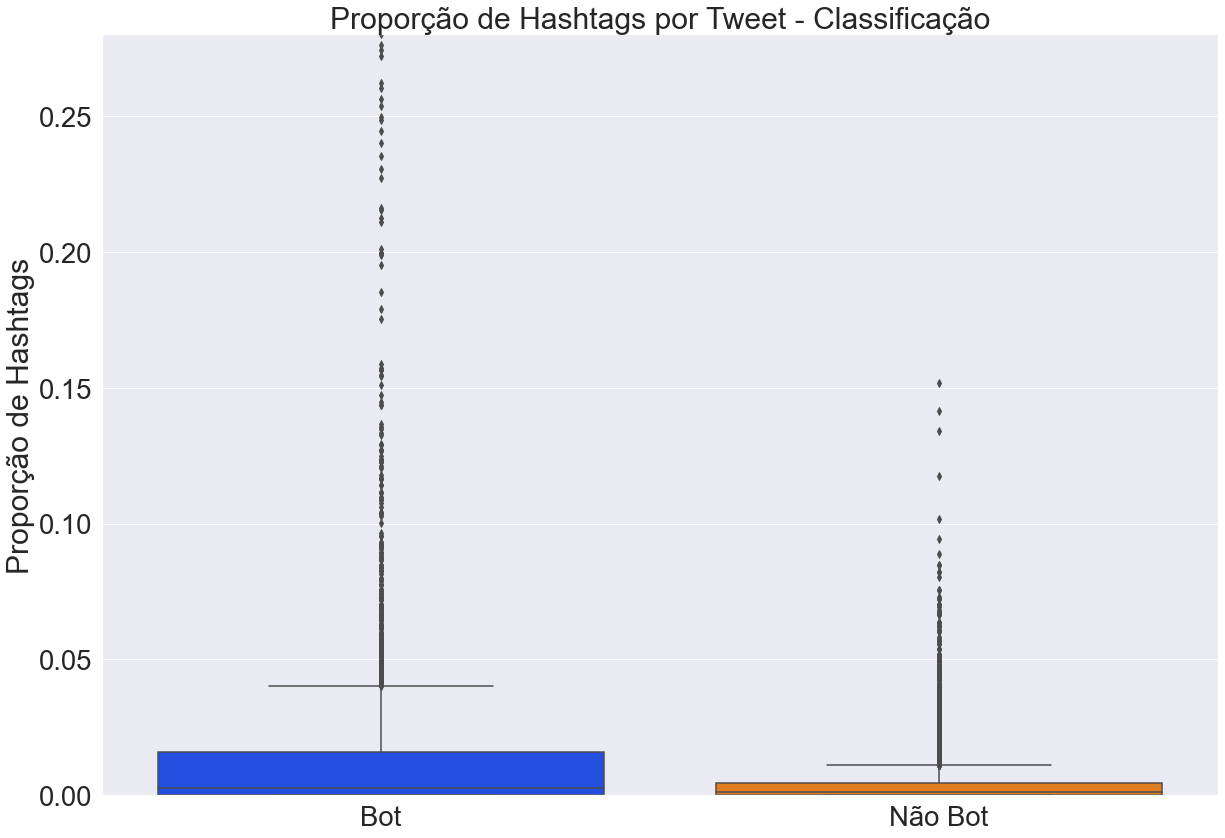

In [83]:
sns.set(font_scale=2.5)
fig = plt.figure(figsize=(20,14))
g = sns.boxplot(x = 'Bot', y = 'media_hashtag', data = df, hue = 'Bot', dodge=False, palette = "bright")
g.legend_.remove()
plt.title('Proporção de Hashtags por Tweet - Classificação')
plt.ylim(0, 0.28)
plt.xlabel('')
plt.ylabel('Proporção de Hashtags')
plt.show()

In [ ]:
# troca_sent sent_neg sent_pos sent_neu

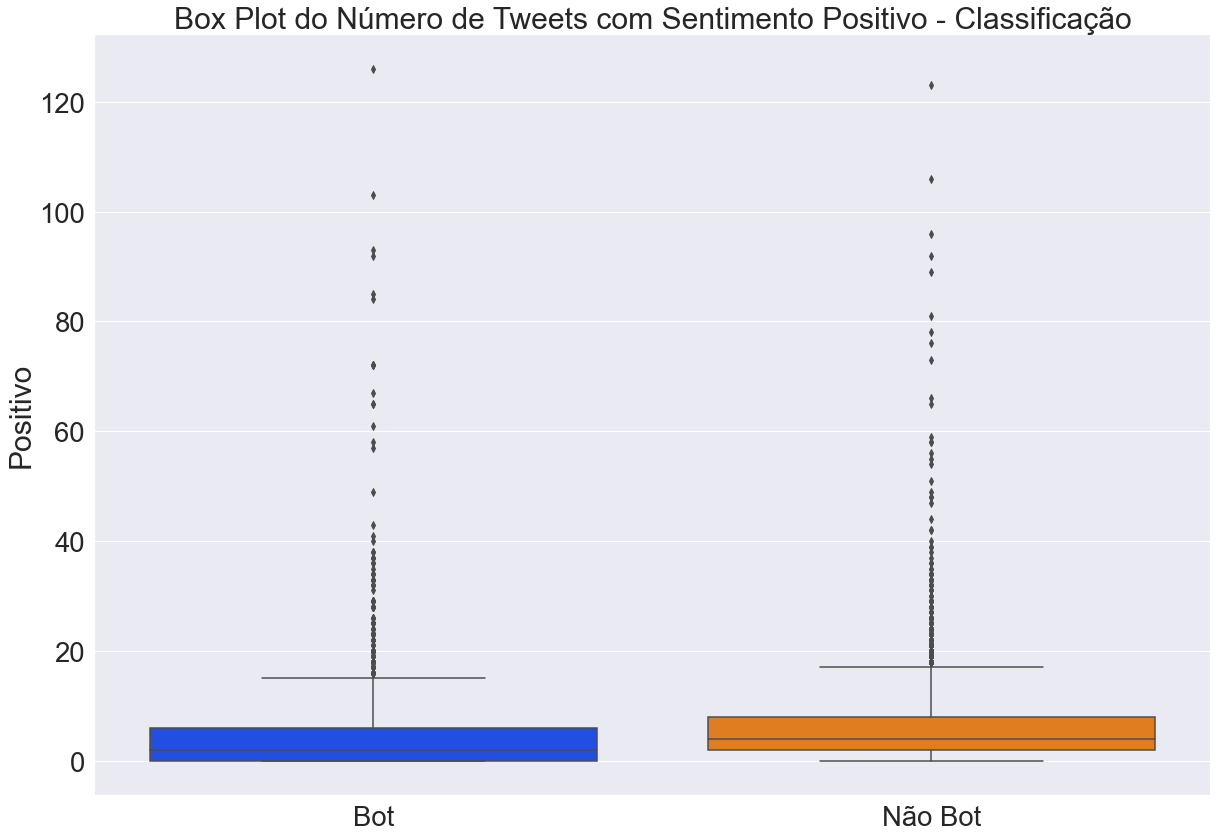

In [94]:
sns.set(font_scale=2.5)
fig = plt.figure(figsize=(20,14))
g = sns.boxplot(x = 'Bot', y = 'sent_pos', data = df, hue = 'Bot', dodge=False, palette = "bright")
g.legend_.remove()
plt.title('Box Plot do Número de Tweets com Sentimento Positivo - Classificação')
#plt.ylim(0, 1)
plt.xlabel('')
plt.ylabel('Positivo')
plt.show()

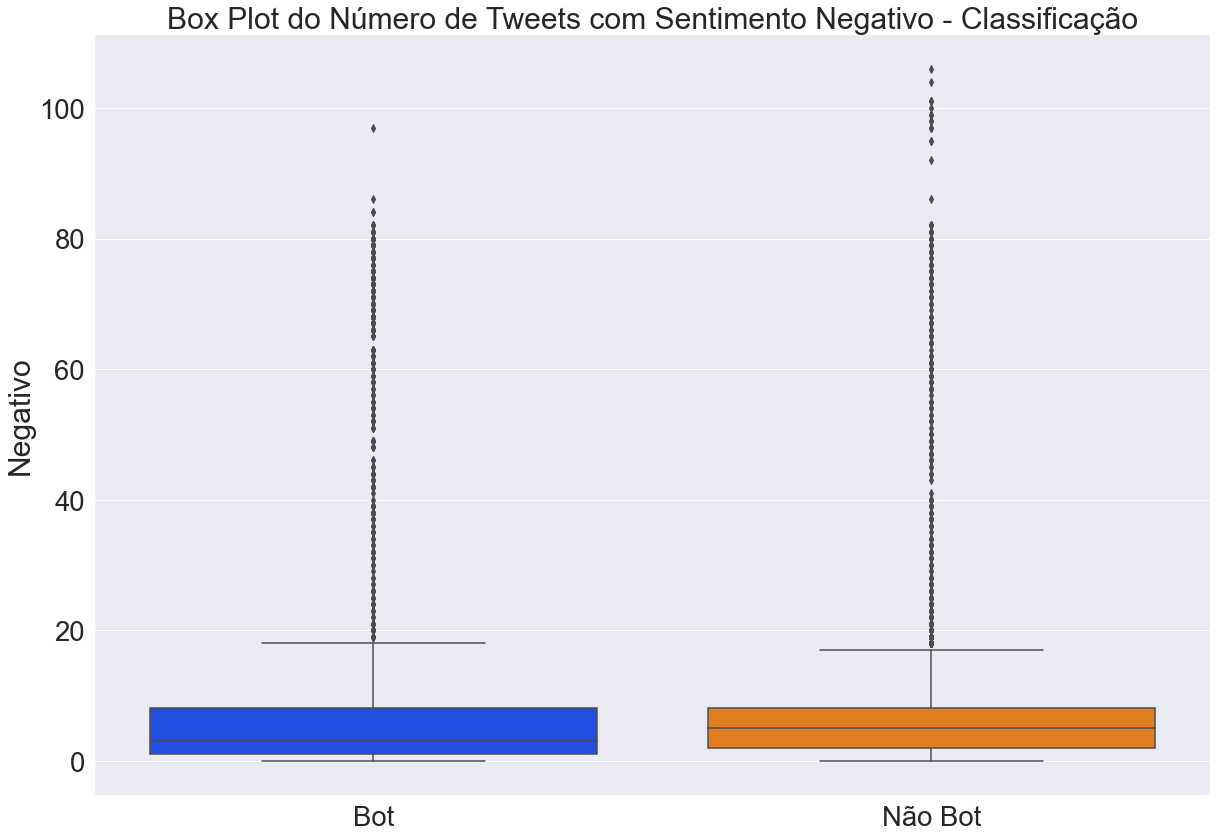

In [95]:
sns.set(font_scale=2.5)
fig = plt.figure(figsize=(20,14))
g = sns.boxplot(x = 'Bot', y = 'sent_neg', data = df, hue = 'Bot', dodge=False, palette = "bright")
g.legend_.remove()
plt.title('Box Plot do Número de Tweets com Sentimento Negativo - Classificação')
#plt.ylim(0, 1)
plt.xlabel('')
plt.ylabel('Negativo')
plt.show()

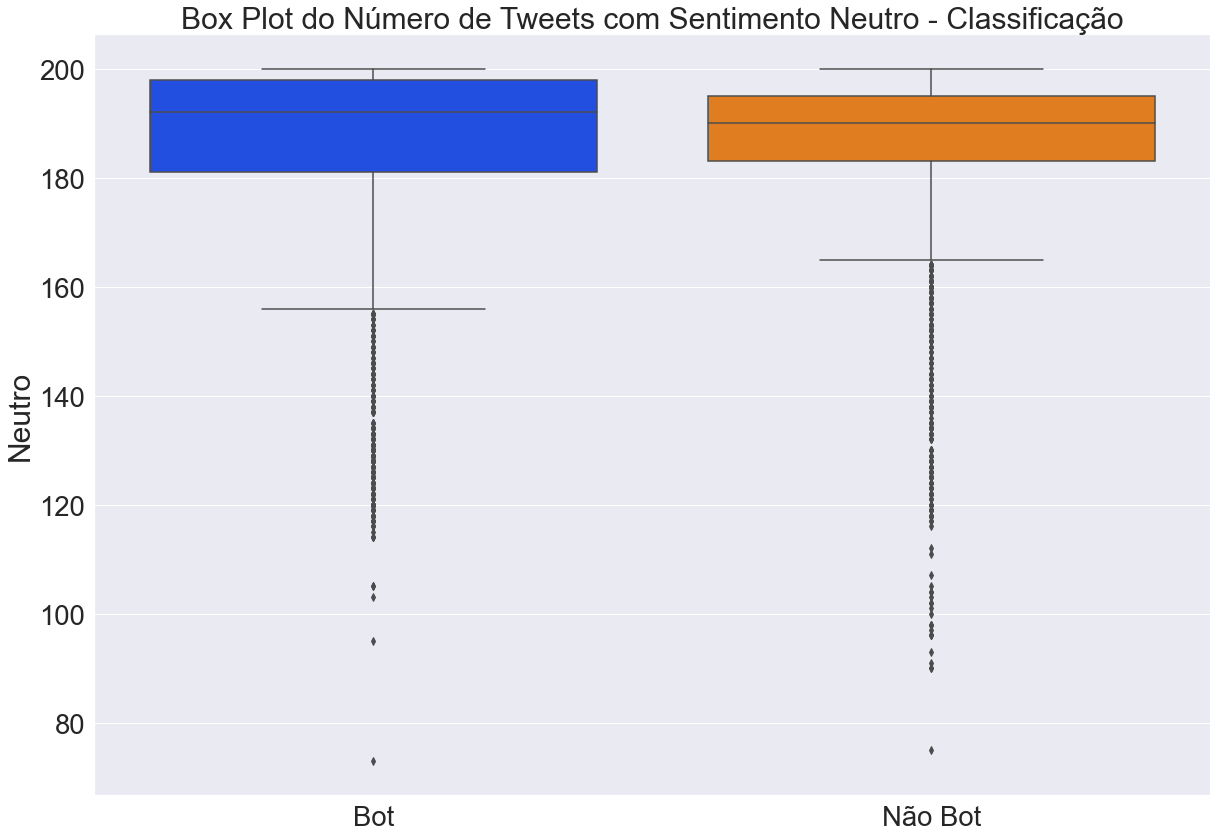

In [96]:
sns.set(font_scale=2.5)
fig = plt.figure(figsize=(20,14))
g = sns.boxplot(x = 'Bot', y = 'sent_neu', data = df, hue = 'Bot', dodge=False, palette = "bright")
g.legend_.remove()
plt.title('Box Plot do Número de Tweets com Sentimento Neutro - Classificação')
#plt.ylim(0, 1)
plt.xlabel('')
plt.ylabel('Neutro')
plt.show()

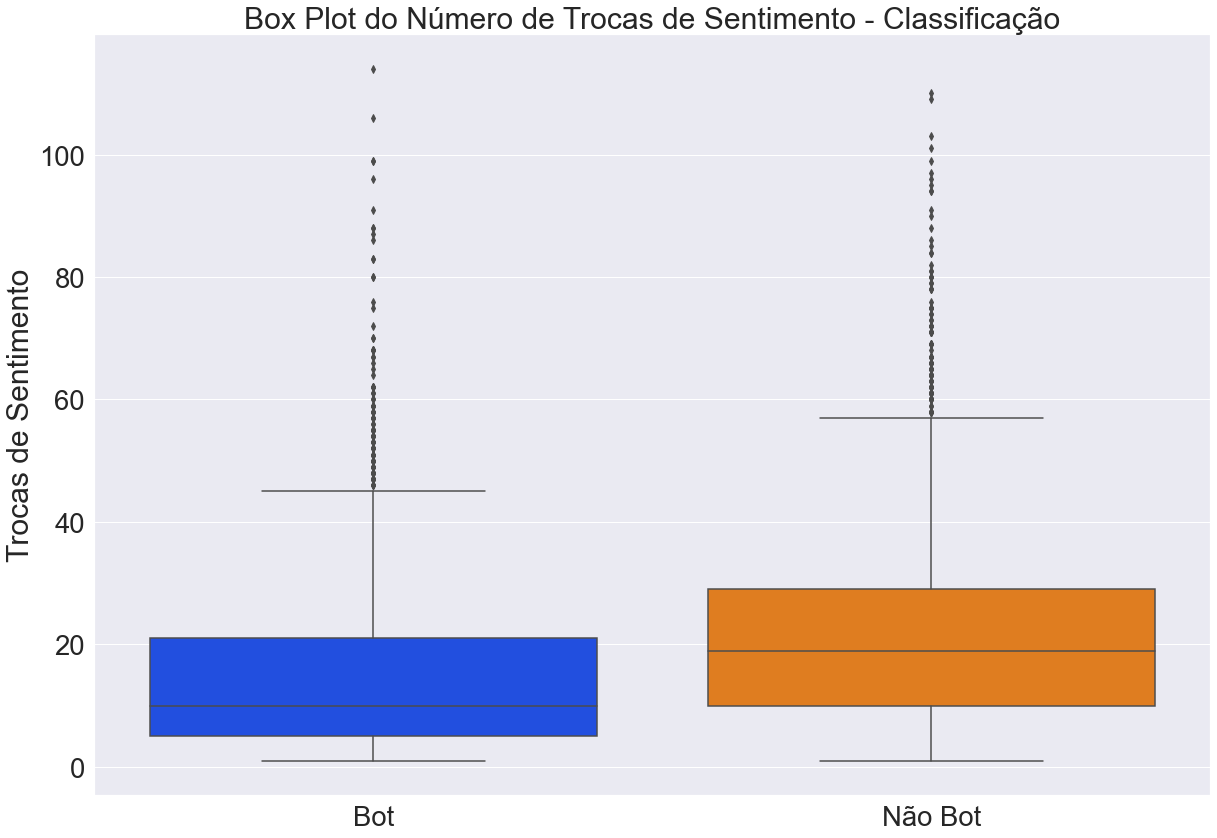

In [92]:
sns.set(font_scale=2.5)
fig = plt.figure(figsize=(20,14))
g = sns.boxplot(x = 'Bot', y = 'troca_sent', data = df, hue = 'Bot', dodge=False, palette = "bright")
g.legend_.remove()
plt.title('Box Plot do Número de Trocas de Sentimento - Classificação')
#plt.ylim(0, 1)
plt.xlabel('')
plt.ylabel('Trocas de Sentimento')
plt.show()

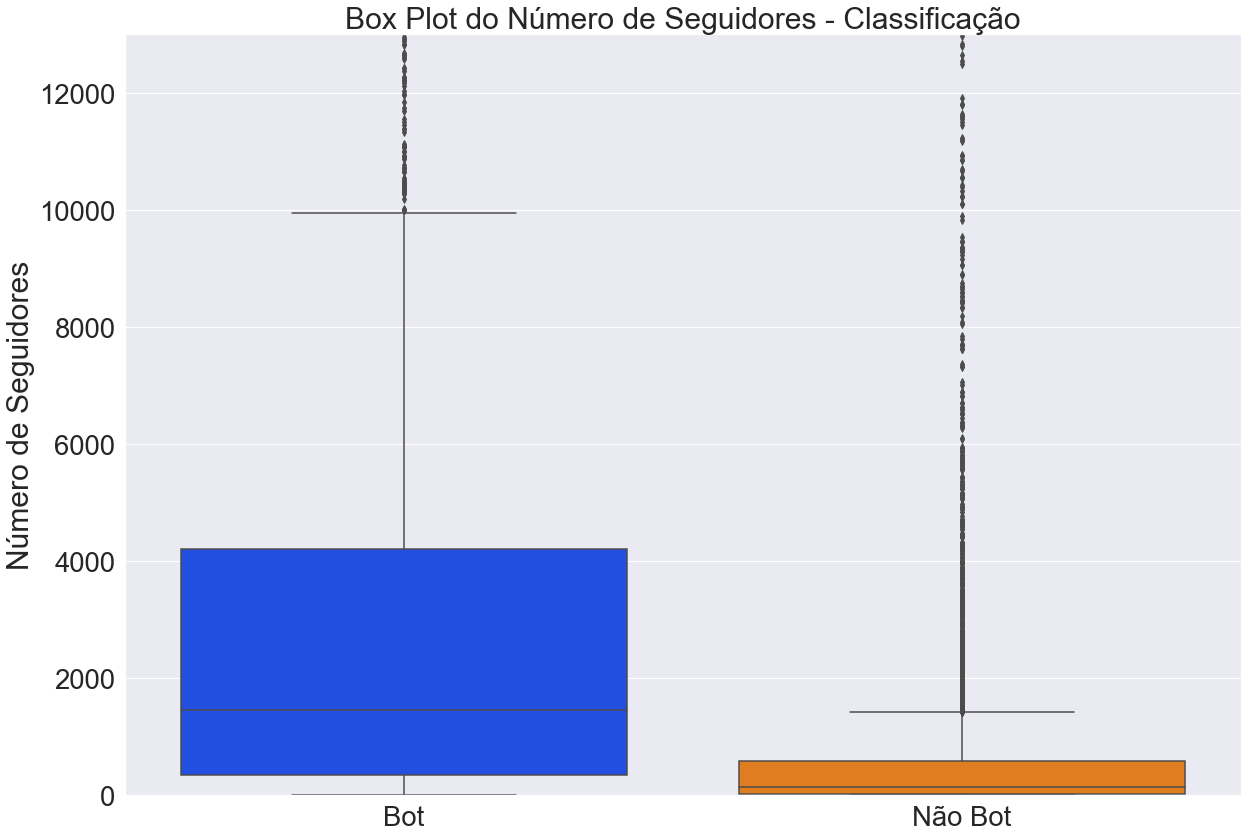

In [81]:
sns.set(font_scale=2.5)
fig = plt.figure(figsize=(20,14))
g = sns.boxplot(x = 'Bot', y = 'N_Seguidores', data = df, hue = 'Bot', dodge=False, palette = "bright")
g.legend_.remove()
plt.title('Box Plot do Número de Seguidores - Classificação')
plt.ylim(0, 13000)
plt.xlabel('')
plt.ylabel('Número de Seguidores')
plt.show()

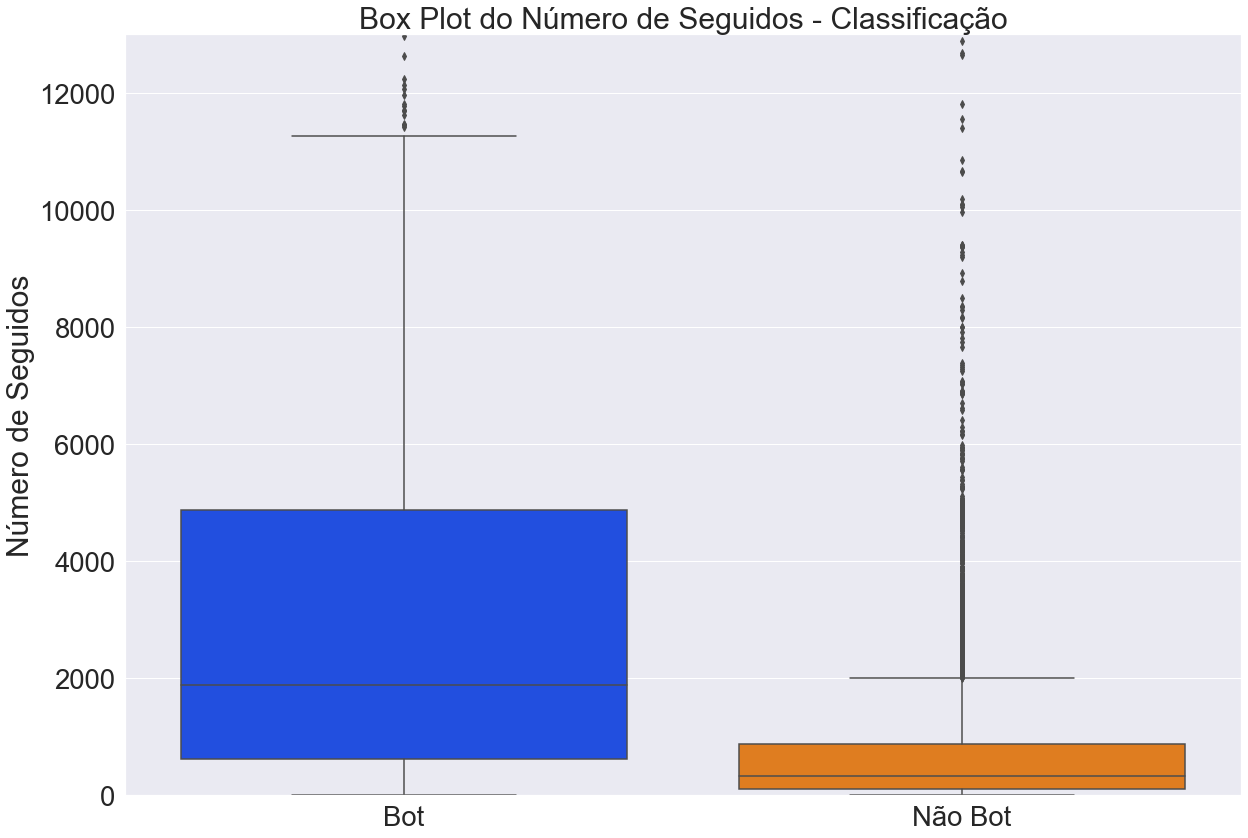

In [82]:
sns.set(font_scale=2.5)
fig = plt.figure(figsize=(20,14))
g = sns.boxplot(x = 'Bot', y = 'N_Seguidos', data = df, hue = 'Bot', dodge=False, palette = "bright")
g.legend_.remove()
plt.title('Box Plot do Número de Seguidos - Classificação')
plt.ylim(0, 13000)
plt.xlabel('')
plt.ylabel('Número de Seguidos')
plt.show()

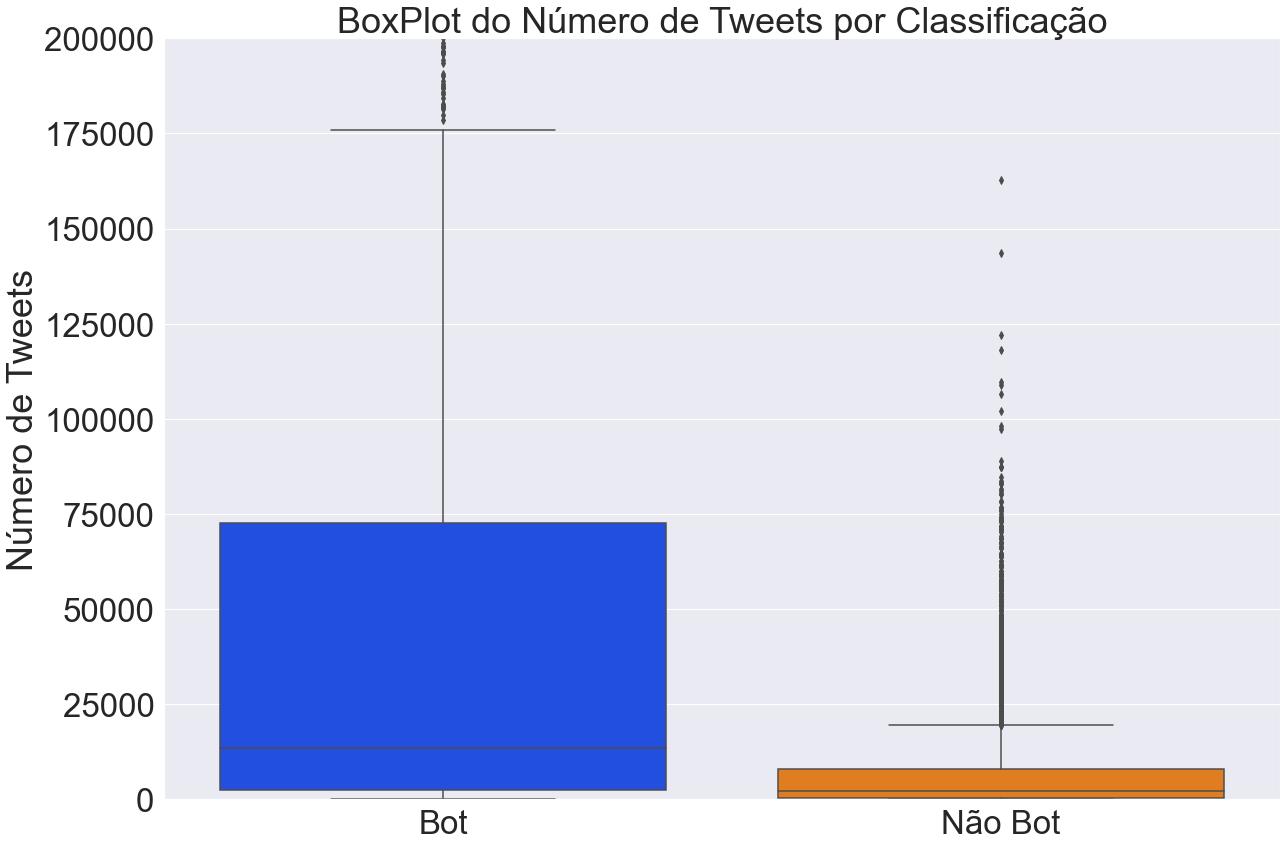

In [5]:
sns.set(font_scale=3)
fig = plt.figure(figsize=(20,14))
g = sns.boxplot(x = 'Bot', y = 'N_Tweets', data = df, hue = 'Bot', dodge=False, palette = "bright")
g.legend_.remove()
plt.title('BoxPlot do Número de Tweets por Classificação')
plt.ylim(0, 200000)
plt.xlabel('')
plt.ylabel('Número de Tweets')
plt.show()

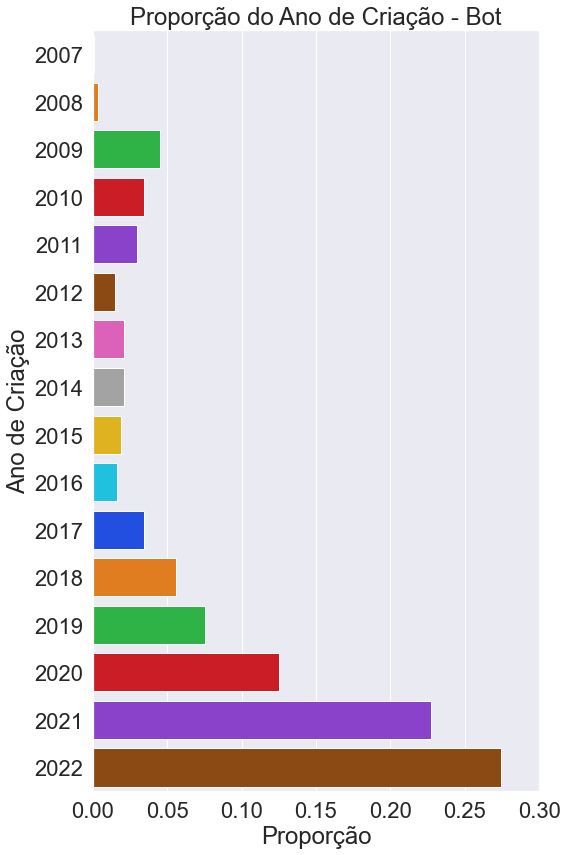

In [61]:
#print(df_bot["Ano_Criacao"].value_counts(normalize=True)*100)

sns.set(font_scale=2)
fig = plt.figure(figsize=(8,14))

d = {"Ano de Criação": df_bot["Ano_Criacao"].value_counts(normalize=True).index,
     "Proporção": df_bot["Ano_Criacao"].value_counts(normalize=True).values}

aux = pd.DataFrame(data = d)

bar = sns.barplot(data = aux, y = "Ano de Criação", x = "Proporção", palette = "bright", orient = "h")

plt.title('Proporção do Ano de Criação - Bot')
plt.xlim(0, 0.3)
plt.show()

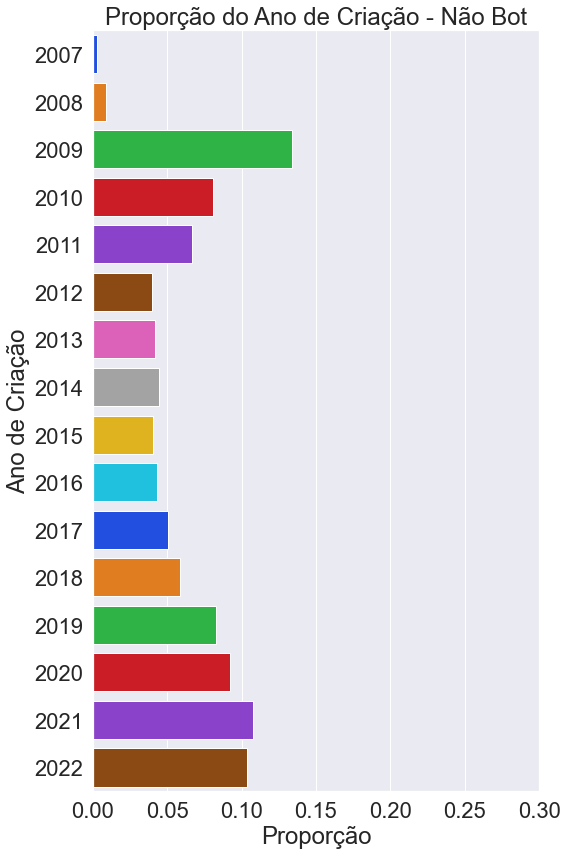

In [62]:
#print(df_hum["Ano_Criacao"].value_counts(normalize=True)*100)

sns.set(font_scale=2)
fig = plt.figure(figsize=(8,14))

d = {"Ano de Criação": df_hum["Ano_Criacao"].value_counts(normalize=True).index,
     "Proporção": df_hum["Ano_Criacao"].value_counts(normalize=True).values}

aux = pd.DataFrame(data = d)

bar = sns.barplot(data = aux, y = "Ano de Criação", x = "Proporção", palette = "bright", orient = "h")

plt.title('Proporção do Ano de Criação - Não Bot')
plt.xlim(0, 0.3)
plt.show()

# Analises Gráficas com relação aos tokens

In [66]:
def get_word_frequency(bot):
    
    filtro = ['+','!','"','#','$','%','&','(',')','*',',','-','.','/',':',';','<', ' ', 'vc','the',
              '=','>','?','@','[',']','^','_','`','{','|','}','🇷','🇧','”','“','0','1', '..', '.',
              '2','3','4','5','6','7','8','9','°', '[]', '...', '', '…', 'pra', 'tá', '¡', 'q', 
              'bolsonaropresidente', 'lulapresidente', 'bolsoladrao', 'luladrao', 'Lula', 'Bolsonaro',
              'lula', 'bolsonaro', 'umar']

    # Word Frequency per Category
    def cleanup_text(docs, logging=False):
        texts = []
        counter = 1
        for doc in docs:
            if counter % 1000 == 0 and logging:
                print("Processed %d out of %d documents." % (counter, len(docs)))
            counter += 1
            doc = pln(str(doc), disable=['parser', 'ner'])
            tokens = [tok.lemma_.lower().strip() for tok in doc if tok.lemma_ != '-PRON-']
            tokens = [tok for tok in tokens if tok not in stop_words and tok not in filtro]
            tokens = ' '.join(tokens)
            texts.append(tokens)
        return pd.Series(texts)

    if bot == 0:
        df_text = [text for text in df_text_aux[df_text_aux['Bot'] == bot]['tweet_concat']]
        #df_text_clean = cleanup_text(df_text)
        #df_text_clean = ' '.join(df_text_clean).split()
        df_text_clean = ' '.join(df_text).split()
        df_text_clean_counts = Counter(df_text_clean)
        df_common_words = [word[0] for word in df_text_clean_counts.most_common(32)]
        df_common_counts = [word[1] for word in df_text_clean_counts.most_common(32)]
        df_common_words.pop(0)
        df_common_words.pop(17) 
        print(df_common_words)
        df_common_counts.pop(0)
        df_common_counts.pop(17) 

        sns.set(font_scale=3)
        fig = plt.figure(figsize=(20,14))
        sns.barplot(y=df_common_words, x=df_common_counts, palette = "bright", orient = "h")
        plt.title(f'Tokens Mais Usados por Não Bots')
    else:
        df_text = [text for text in df_text_aux[df_text_aux['Bot'] == bot]['tweet_concat']]
        #df_text_clean = cleanup_text(df_text)
        #df_text_clean = ' '.join(df_text_clean).split()
        df_text_clean = ' '.join(df_text).split()
        df_text_clean_counts = Counter(df_text_clean)
        df_common_words = [word[0] for word in df_text_clean_counts.most_common(32)]
        df_common_counts = [word[1] for word in df_text_clean_counts.most_common(32)]
        df_common_words.pop(0)
        df_common_words.pop(4)
        print(df_common_words)
        df_common_counts.pop(0)
        df_common_counts.pop(4)

        sns.set(font_scale=3)
        fig = plt.figure(figsize=(20,14))
        sns.barplot(y=df_common_words, x=df_common_counts, palette = "bright", orient = "h")
        plt.title(f'Tokens Mais Usados por Bots')
    #plt.xticks(rotation=90)
    plt.show()


['face_with_tears_of_joy', 'parir', 'clapping_hands', 'brasil', 'dia', 'comer', 'pelar', 'querer', 'sdv', 'presidente', 'seguir', 'folded_hands', 'red_heart', 'suar', 'votar', 'ficar', 'deus', 'triangular_flag', 'thumbs_up', 'ajudar', 'voltar', 'light_skin_tone', 'caro', 'seguindo', 'ano', 'falar', 'outro', 'país', 'pessoa', 'backhand_index_pointing_down']


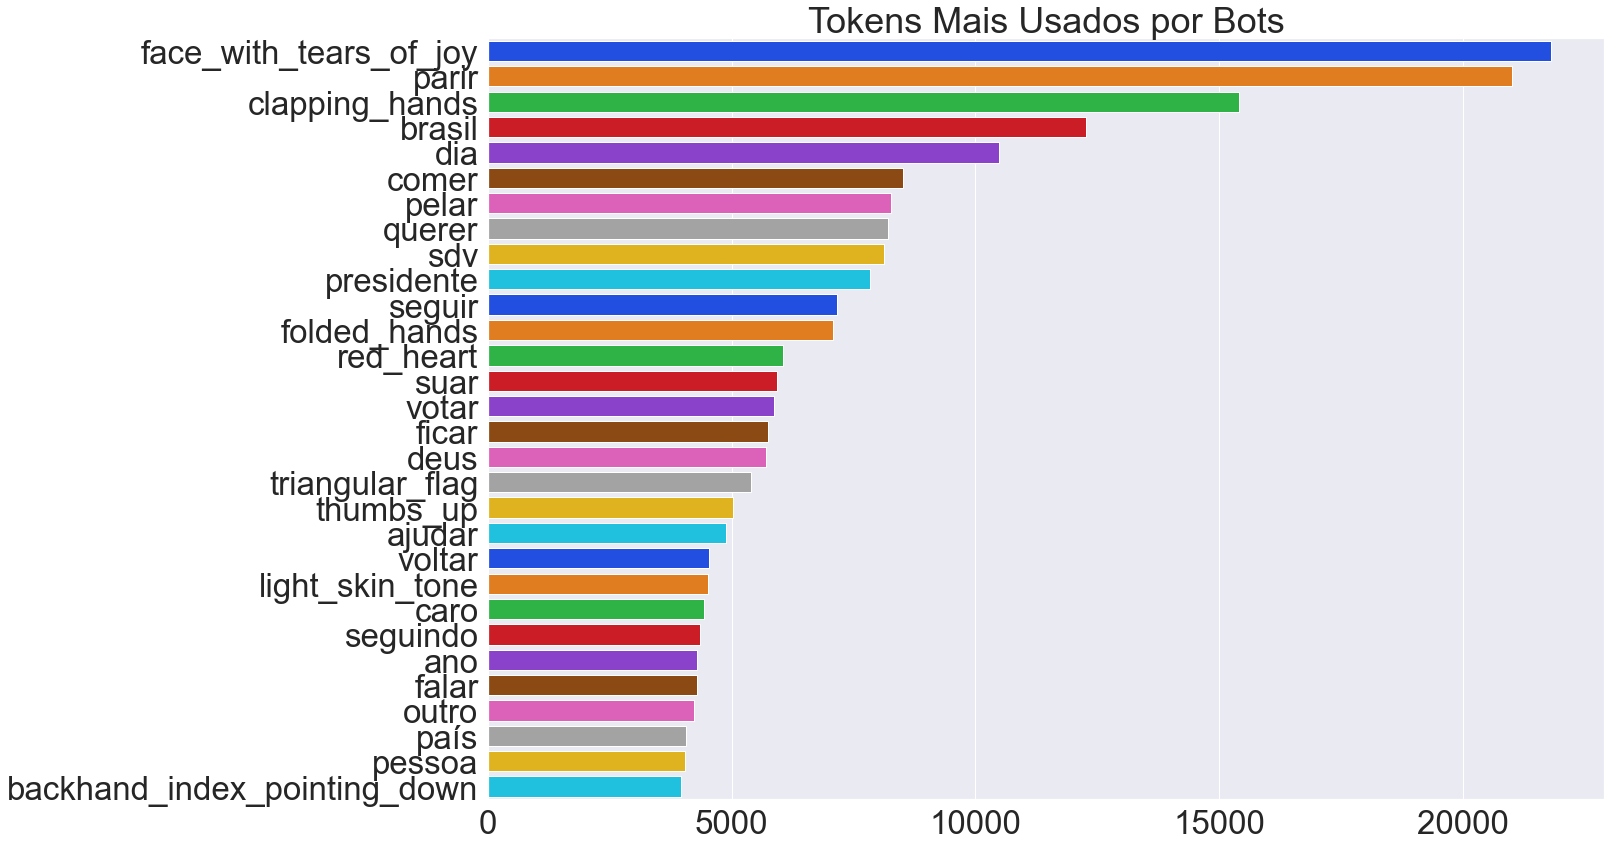

In [67]:
get_word_frequency(1)

['rolling_on_the_floor_laughing', 'face_with_tears_of_joy', 'comer', 'querer', 'brasil', 'pelar', 'dia', 'ficar', 'clapping_hands', 'suar', 'presidente', 'caro', 'falar', 'outro', 'ano', 'pessoa', 'gente', 'votar', 'achar', 'dessar', 'passar', 'nado', 'deus', 'país', 'dever', 'vir', 'hoje', 'stf', 'casar', 'político']


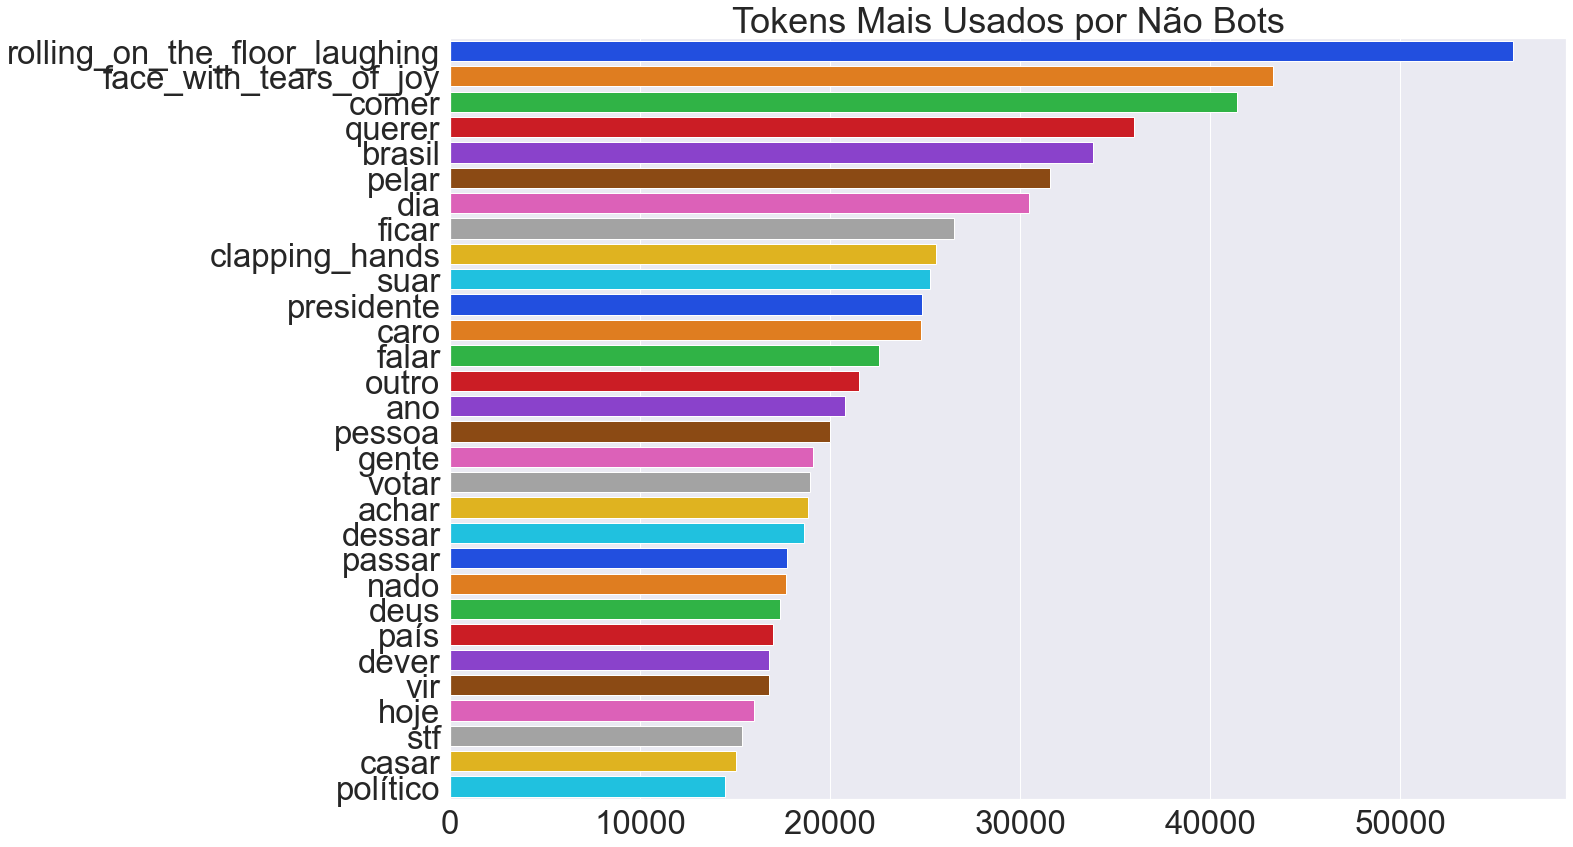

In [68]:
get_word_frequency(0)

# Modelo

In [1]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score 

In [2]:
df_modelo = pd.read_excel(r"D:\Users\User\Desktop\PC\Faculdade\TCC\TwitterCrawlerOficial\BasesFinais\baseModelo.xlsx")
df_modelo['Bot'].value_counts()

0    5533
1    2301
Name: Bot, dtype: int64

In [5]:
df_modelo_completo = df_modelo.copy()

X = df_modelo_completo.drop(['Bot'], 1)
y = df_modelo_completo['Bot']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, train_size = 0.5, random_state = 0)

C:\Users\Usuario\AppData\Local\Temp/ipykernel_8796/2843722811.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df_modelo_completo.drop(['Bot'], 1)


In [6]:
print(X_train.shape, X_test.shape, X_valid.shape)

(6267, 3014) (783, 3014) (784, 3014)


## Modelo com todas as variáveis

In [18]:
modelo = MultinomialNB()
modelo.fit(X_train,y_train)

result = modelo.predict(X_test)

cm_completo = confusion_matrix(y_test, result)

print(f"Acurácia: {accuracy_score(result,y_test)}\nSensibilidade: {cm_completo[0][0] / (cm_completo[0][0] + cm_completo[1][0])}\nEspecificidade: {cm_completo[1][1] / (cm_completo[1][1] + cm_completo[0][1])}")

Acurácia: 0.6590038314176245
Sensibilidade: 0.8045267489711934
Especificidade: 0.4208754208754209


In [19]:
cm_completo

array([[391, 172],
       [ 95, 125]], dtype=int64)

## Modelo sem os tokens

In [7]:
# X = df_modelo_semtoken.drop(['Bot'], 1)
# y = df_modelo_semtoken['Bot']

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

X_train_semtoken = X_train[['N_Seguidores', 'N_Seguidos', 'N_Tweets', 'sent_neg', 'sent_pos', 'sent_neu', 'troca_sent', 
                     'media_vb', 'media_adj', 'media_adv', 'media_pron', 'media_hashtag', 'Ano_Criacao', 
                     'Tem_Background_Img']]
X_test_semtoken = X_test[['N_Seguidores', 'N_Seguidos', 'N_Tweets', 'sent_neg', 'sent_pos', 'sent_neu', 'troca_sent', 
                     'media_vb', 'media_adj', 'media_adv', 'media_pron', 'media_hashtag', 'Ano_Criacao', 
                     'Tem_Background_Img']]

modelo = MultinomialNB()
modelo.fit(X_train_semtoken,y_train)

result = modelo.predict(X_test_semtoken)
accuracy_score(result,y_test)

cm_semtoken = confusion_matrix(y_test, result)

print(f"Acurácia: {accuracy_score(result,y_test)}\nSensibilidade: {cm_semtoken[0][0] / (cm_semtoken[0][0] + cm_semtoken[1][0])}\nEspecificidade: {cm_semtoken[1][1] / (cm_semtoken[1][1] + cm_semtoken[0][1])}")

Acurácia: 0.7713920817369093
Sensibilidade: 0.8018867924528302
Especificidade: 0.6394557823129252


In [8]:
cm_semtoken

array([[510,  53],
       [126,  94]], dtype=int64)

## Modelo somente tokens

In [22]:
# X = df_modelo_sotoken.drop(['Bot'], 1)
# y = df_modelo_sotoken['Bot']

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

X_train_sotoken = X_train.drop(['N_Seguidores', 'N_Seguidos', 'N_Tweets', 'sent_neg', 'sent_pos', 'sent_neu', 'troca_sent', 
                                    'media_vb', 'media_adj', 'media_adv', 'media_pron', 'media_hashtag', 'Ano_Criacao', 
                                    'Tem_Background_Img'], 1)
X_test_sotoken = X_test.drop(['N_Seguidores', 'N_Seguidos', 'N_Tweets', 'sent_neg', 'sent_pos', 'sent_neu', 'troca_sent', 
                                    'media_vb', 'media_adj', 'media_adv', 'media_pron', 'media_hashtag', 'Ano_Criacao', 
                                    'Tem_Background_Img'], 1)

modelo = MultinomialNB()
modelo.fit(X_train_sotoken,y_train)

result = modelo.predict(X_test_sotoken)
accuracy_score(result,y_test)

cm_sotoken = confusion_matrix(y_test, result)

print(f"Acurácia: {accuracy_score(result,y_test)}\nSensibilidade: {cm_sotoken[0][0] / (cm_sotoken[0][0] + cm_sotoken[1][0])}\nEspecificidade: {cm_sotoken[1][1] / (cm_sotoken[1][1] + cm_sotoken[0][1])}")

Acurácia: 0.6462324393358876
Sensibilidade: 0.7883064516129032
Especificidade: 0.40069686411149824


In [23]:
cm_sotoken

array([[391, 172],
       [105, 115]], dtype=int64)

## Validação do modelo final (sem os tokens)

In [10]:
X_valid = X_valid[['N_Seguidores', 'N_Seguidos', 'N_Tweets', 'sent_neg', 'sent_pos', 'sent_neu', 'troca_sent', 
                   'media_vb', 'media_adj', 'media_adv', 'media_pron', 'media_hashtag', 'Ano_Criacao', 
                   'Tem_Background_Img']]

result = modelo.predict(X_valid)
accuracy_score(result, y_valid)

cm_final = confusion_matrix(y_valid, result)

print(f"Acurácia: {accuracy_score(result,y_valid)}\nSensibilidade: {cm_final[0][0] / (cm_final[0][0] + cm_final[1][0])}\nEspecificidade: {cm_final[1][1] / (cm_final[1][1] + cm_final[0][1])}")

Acurácia: 0.7448979591836735
Sensibilidade: 0.7859531772575251
Especificidade: 0.6129032258064516


In [11]:
cm_final

array([[470,  72],
       [128, 114]], dtype=int64)